In [ ]:
# Import Data via Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Fraud Detection/creditcard.csv'

# Membaca file CSV sebagai DataFrame
df = pd.read_csv(file_path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

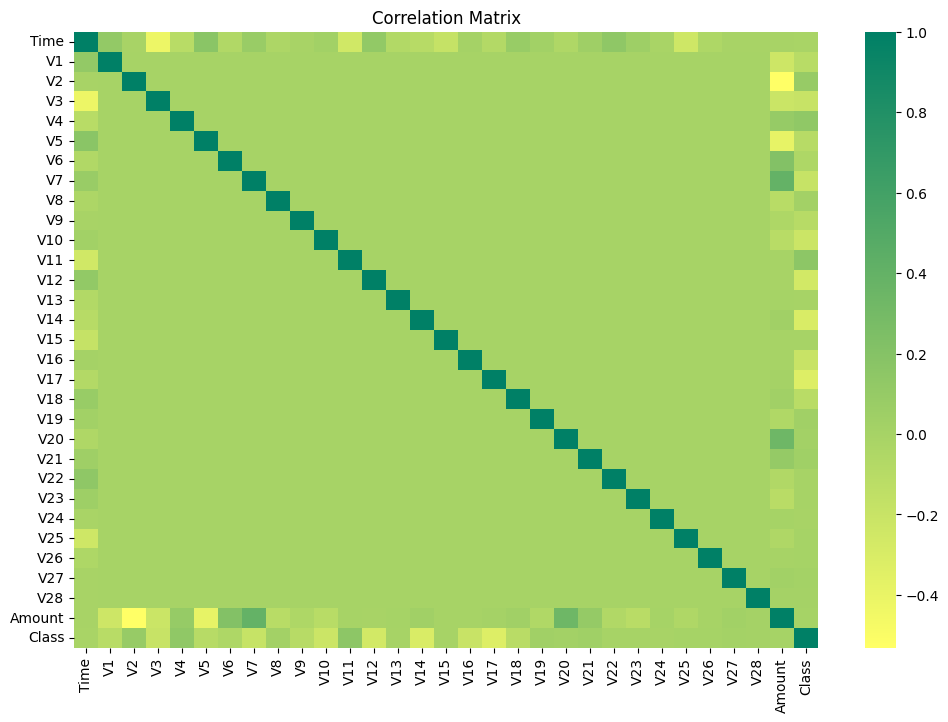

In [ ]:
# Melihat Korelasi antar variabel
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='summer_r', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64


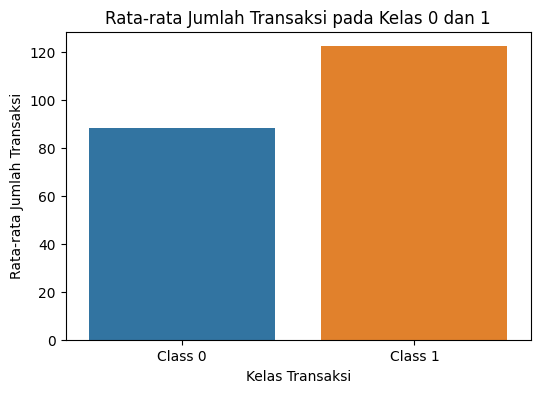

In [ ]:
# Mengelompokkan data berdasarkan kelas dan menghitung rata-rata amount
class_amount_avg = df.groupby('Class')['Amount'].mean()
print(class_amount_avg)
# Membuat bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_amount_avg.index, y=class_amount_avg.values)
plt.title('Rata-rata Jumlah Transaksi pada Kelas 0 dan 1')
plt.xlabel('Kelas Transaksi')
plt.ylabel('Rata-rata Jumlah Transaksi')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()


In [ ]:
# Membuat fitur "Hour" dari fitur "Time"
df["Hour"] = df["Time"].apply(lambda x: int((x / 3600) % 24))

# Mengelompokkan data berdasarkan Hour dan Class
grouped = df.groupby(["Hour", "Class"]).size().reset_index(name="Jumlah Transaksi")
print(grouped)
# Membuat plot menggunakan Plotly Express
fig = px.line(grouped, x="Hour", y="Jumlah Transaksi", color="Class",
              title="Jumlah Transaksi per Jam Berdasarkan Kelas",
              labels={"Hour": "Jam", "Jumlah Transaksi": "Jumlah Transaksi", "Class": "Kelas"})

# Menampilkan plot
fig.show()

    Hour  Class  Jumlah Transaksi
0      0      0              7689
1      0      1                 6
2      1      0              4210
3      1      1                10
4      2      0              3271
5      2      1                57
6      3      0              3475
7      3      1                17
8      4      0              2186
9      4      1                23
10     5      0              2979
11     5      1                11
12     6      0              4092
13     6      1                 9
14     7      0              7220
15     7      1                23
16     8      0             10267
17     8      1                 9
18     9      0             15822
19     9      1                16
20    10      0             16590
21    10      1                 8
22    11      0             16803
23    11      1                53
24    12      0             15403
25    12      1                17
26    13      0             15348
27    13      1                17
28    14      

0    284315
1       492
Name: Class, dtype: int64


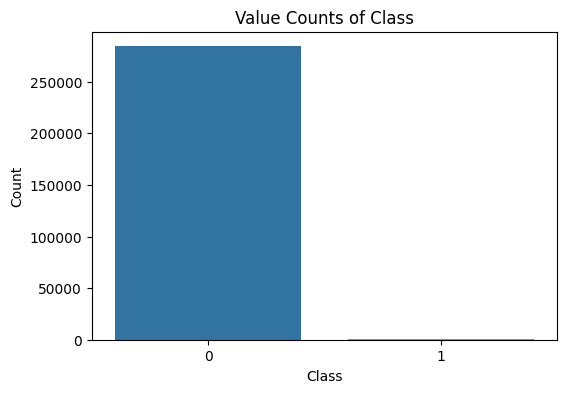

In [ ]:
# Membuat value counts dari kolom "Class"
class_counts = df["Class"].value_counts()
print(class_counts )
()
# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Value Counts of Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Distribution of Fraud and Normal Transactions

px.pie(df, names="Class", title="Distribution of Fraud and Normal Transactions:(Normal:0 | Fraud:1)", color_discrete_sequence=['#1E90FF', '#FF4500'],
       template="plotly_dark", width=800, height=600)

In [ ]:
# Bagi fitur dan variabel target
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
# Bagi menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 31), (56962, 31), (227845,), (56962,))

In [ ]:
# Skalakan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Terapkan SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_train_resampled.shape, y_train_resampled.shape

((454902, 31), (454902,))

## Algoritma KNN

In [ ]:
# Latih model KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Prediksi pada set pengujian
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Matriks Keamanan
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
# Laporan Klasifikasi
report = classification_report(y_test, y_pred)

In [ ]:
# Kurva ROC
y_scores = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

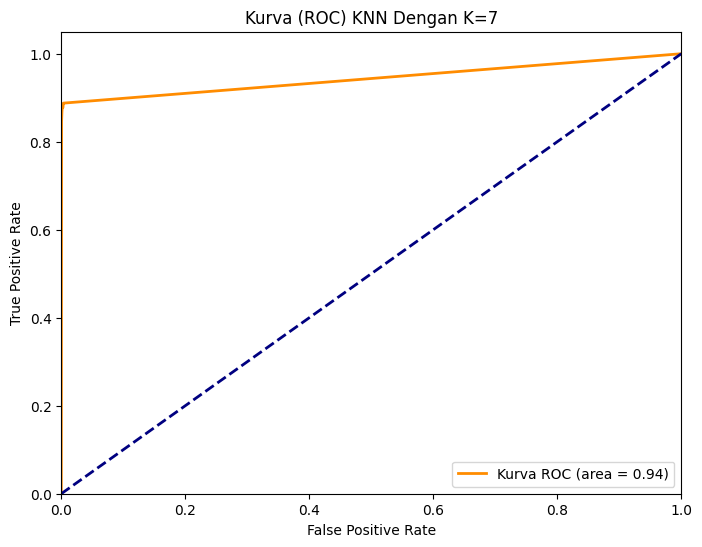

In [ ]:
# Gambar Kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Kurva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva (ROC) KNN Dengan K=7')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Hitung metrik lainnya
accuracy = knn.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cetak Matriks Keamanan dan Laporan Klasifikasi
print("Confusion Matriks:")
print(confusion)
print("\nLaporan Klasifikasi:")
print(report)

# Cetak metrik lainnya
print("\nMetrik:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Skor: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

Confusion Matriks:
[[56744   120]
 [   12    86]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.88      0.57        98

    accuracy                           1.00     56962
   macro avg       0.71      0.94      0.78     56962
weighted avg       1.00      1.00      1.00     56962


Metrik:
Akurasi: 1.00
Presisi: 0.42
Recall: 0.88
F1-Skor: 0.57
AUC: 0.94


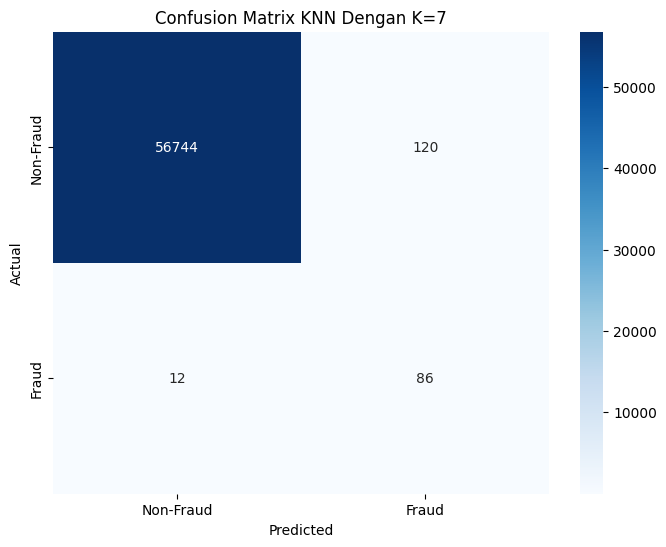

In [ ]:
# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix KNN Dengan K=7")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Algoritma Regresi Logistik

In [ ]:
# Inisialisasi model Regresi Logistik
logreg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(l1_ratio=0.5, penalty='elasticnet', random_state=42,
                   solver='saga')

In [ ]:
# Prediksi pada set pengujian
y_pred = logreg.predict(X_test_scaled)
# Matriks Keamanan
confusion = confusion_matrix(y_test, y_pred)
# Laporan Klasifikasi
report = classification_report(y_test, y_pred)


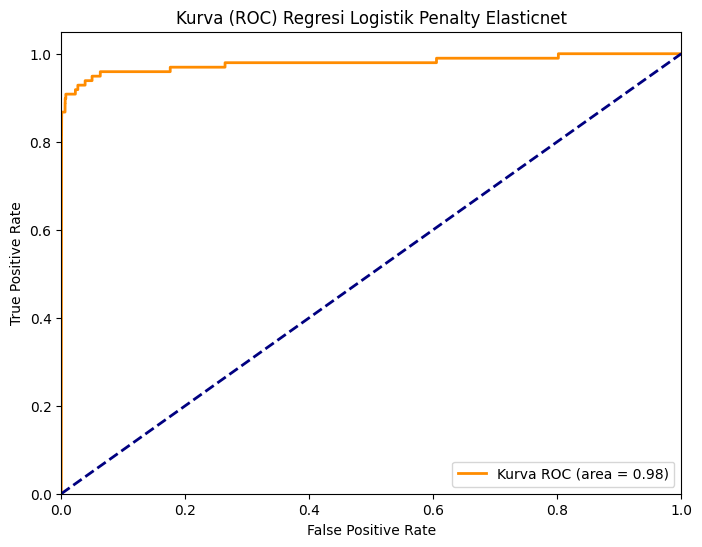

In [ ]:
# Kurva ROC
y_scores = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Gambar Kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Kurva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva (ROC) Regresi Logistik Penalty Elasticnet')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Hitung metrik lainnya
accuracy = logreg.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cetak Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(report)

# Cetak metrik lainnya
print("\nMetrik:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Skor: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


Metrik:
Akurasi: 0.97
Presisi: 0.06
Recall: 0.92
F1-Skor: 0.11
AUC: 0.98


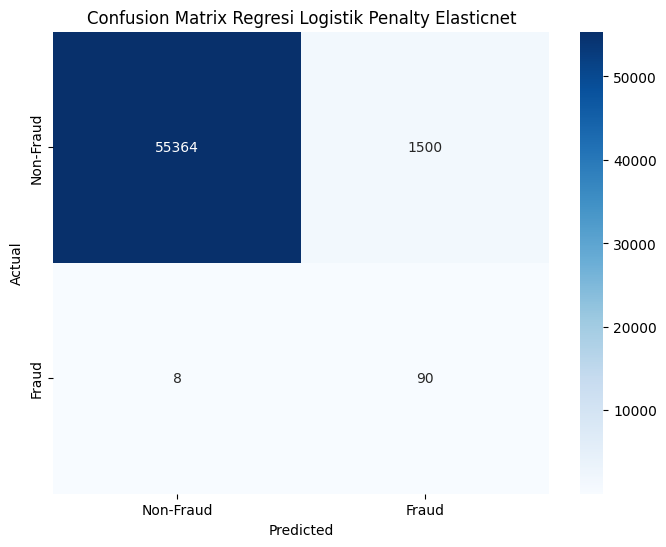

In [ ]:
# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix Regresi Logistik Penalty Elasticnet")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Algoritma Decision Tree

In [ ]:
# Inisialisasi model Decision Tree
tree = DecisionTreeClassifier(random_state=42, criterion='log_loss')
tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

In [ ]:
# Prediksi pada set pengujian
y_pred = tree.predict(X_test_scaled)
# Matriks Keamanan
confusion = confusion_matrix(y_test, y_pred)
# Laporan Klasifikasi
report = classification_report(y_test, y_pred)

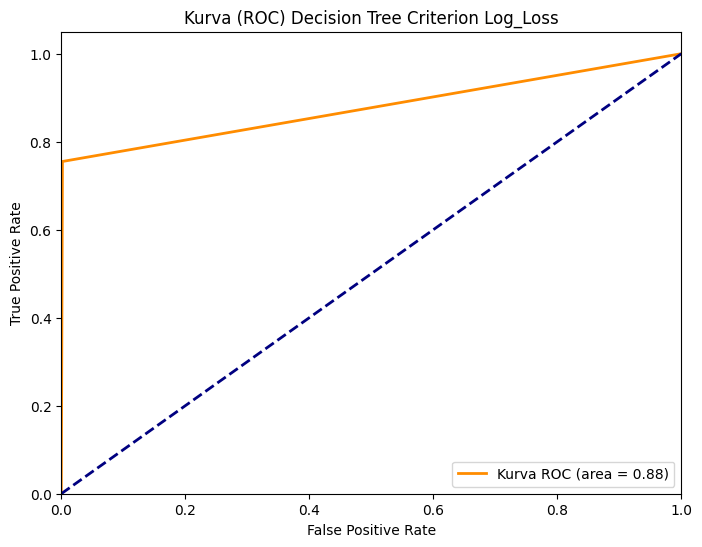

In [ ]:
# Kurva ROC
y_scores = tree.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Gambar Kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Kurva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva (ROC) Decision Tree Criterion Log_Loss')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Hitung metrik lainnya
accuracy = tree.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cetak Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(report)

# Cetak metrik lainnya
print("\nMetrik:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Skor: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.76      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962


Metrik:
Akurasi: 1.00
Presisi: 0.41
Recall: 0.76
F1-Skor: 0.53
AUC: 0.88


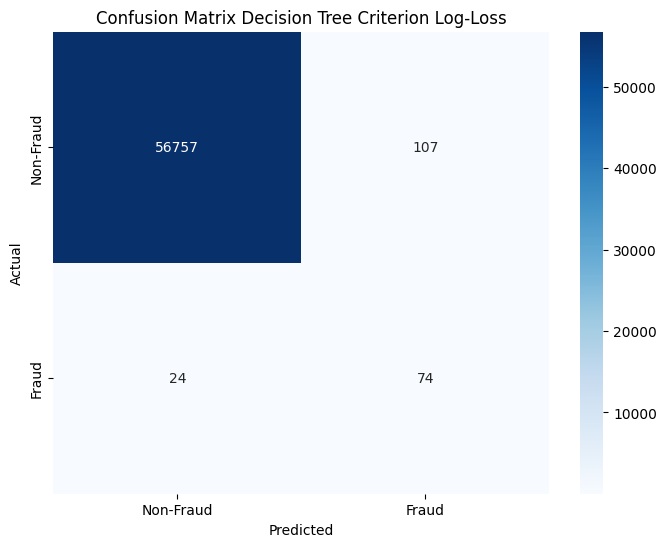

In [ ]:
# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix Decision Tree Criterion Log-Loss")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()